# Loading data from "Benchmark dataset"

In [10]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [ ]:
tf.compat.v1.Config

In [9]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [4]:
PROJECT_ROOT_DIR = "/Users/arto/Dropbox/Data" #this is the working directory for the project

In [5]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [1]:
cd /Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training

/Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training


In [2]:
ls

Train_Dst_NoAuction_ZScore_CF_1.txt  Train_Dst_NoAuction_ZScore_CF_6.txt
Train_Dst_NoAuction_ZScore_CF_2.txt  Train_Dst_NoAuction_ZScore_CF_7.txt
Train_Dst_NoAuction_ZScore_CF_3.txt  Train_Dst_NoAuction_ZScore_CF_8.txt
Train_Dst_NoAuction_ZScore_CF_4.txt  Train_Dst_NoAuction_ZScore_CF_9.txt
Train_Dst_NoAuction_ZScore_CF_5.txt


In [10]:
dataset8 = pd.read_csv('Train_Dst_NoAuction_ZScore_CF_8.txt', delim_whitespace=True, header = None)

To do : read in all files into one file.


### Plot dataset

In [14]:
dataset8.iloc[-10:,:].apply(pd.DataFrame.describe, axis =1)

,count,mean,std,min,25%,50%,75%,max
139,310228.0,-1.101654e-10,1.000000,-0.833324,-0.794151,-0.462342,0.495104,5.579778
140,310228.0,5.348802e-10,1.000000,-0.841800,-0.800630,-0.447070,0.488984,5.556977
141,310228.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
142,310228.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
143,310228.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
144,310228.0,1.997624e+00,0.609904,1.000000,2.000000,2.000000,2.000000,3.000000
145,310228.0,1.994872e+00,0.690994,1.000000,2.000000,2.000000,2.000000,3.000000
146,310228.0,1.992212e+00,0.741660,1.000000,1.000000,2.000000,3.000000,3.000000
147,310228.0,1.989837e+00,0.805116,1.000000,1.000000,2.000000,3.000000,3.000000
148,310228.0,1.985698e+00,0.878210,1.000000,1.000000,2.000000,3.000000,3.000000


In [16]:
dataset8_max = dataset8.apply(pd.DataFrame.max, axis = 1)

#### Max

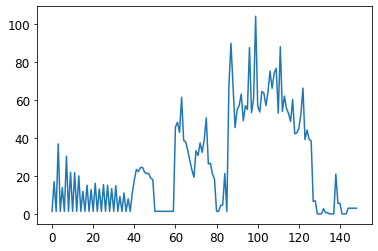

In [26]:
plt.plot(dataset8_max.values)

#### Min


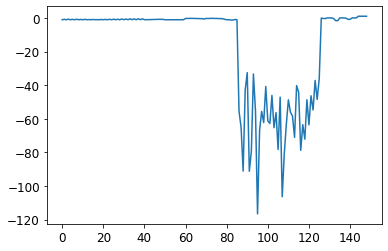

In [27]:
plt.plot(dataset8.apply(pd.DataFrame.min, axis =1 ))

#### StDev

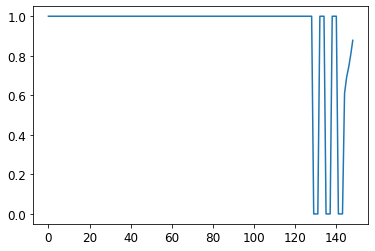

In [29]:
plt.plot(dataset8.apply(pd.DataFrame.std, axis = 1))

#### Mean


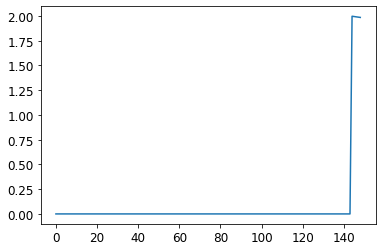

In [30]:
plt.plot(dataset8.apply(pd.DataFrame.mean, axis = 1))

#### Median


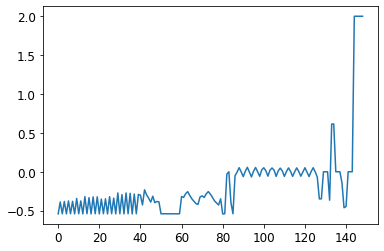

In [31]:
plt.plot(dataset8.apply(pd.DataFrame.median, axis =1))

### Preprocessing not required

Since the dataset has already been normalised, no further processing is required.


## Model

In [32]:
dataset8.shape

(149, 310228)

In [41]:
X_train = dataset8.iloc[:140, :200000]

In [45]:
X_valid = dataset8.iloc[:140, 200000:]

In [42]:
X_train.shape

(140, 200000)

In [73]:
y_train = dataset8.iloc[-1, :200000]

In [74]:
y_valid = dataset8.iloc[-1:, 200000:]

In [75]:
y_valid

,200000,200001,200002,200003,200004,200005,200006,200007,200008,200009,...,310218,310219,310220,310221,310222,310223,310224,310225,310226,310227
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))


In [52]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [83]:
y_train = np.asarray(y_train)

In [59]:
X_train = np.asarray(X_train)

In [58]:
type(y_train)

numpy.ndarray

In [91]:
y_valid = np.asarray(y_valid)

In [61]:
X_valid = np.asarray(X_valid)

In [70]:
y_valid = y_valid.transpose()

In [66]:
X_valid = X_valid.transpose()
y_valid = y_valid.transpose()
X_train = X_train.transpose()
y_train = y_train.transpose()


In [94]:
print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)

(110228, 140, 1)
(110228, 1)
(200000, 140, 1)
(200000, 1)


In [96]:
print(type(X_valid))
print(type(y_valid))
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [97]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

Train on 200000 samples, validate on 110228 samples
Epoch 1/10
    32/200000 [..............................] - ETA: 10:22

ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 200000 but received input with shape [32, 140, 1]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))


Train on 200000 samples, validate on 110228 samples
Epoch 1/5


In [80]:
X_train.shape

(200000, 140, 1)

In [79]:
X_train = X_train.reshape(200000, 140, 1)

In [86]:
y_train.shape

(200000, 1)

In [85]:
y_train = y_train.reshape(200000, 1)

In [87]:
X_valid.shape

(110228, 140)

In [88]:
X_valid = X_valid.reshape(110228, 140, 1)

In [92]:
y_valid.shape

(1, 110228)

In [93]:
y_valid = y_valid.reshape(110228,1)

## Config

NameError: name 'tf' is not defined